# Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

from collections import defaultdict
from natsort import natsorted

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


# Import Dataset

In [2]:
df = pd.read_excel("data stok beras.xlsx")
df['Tanggal'] =  pd.to_datetime(df['Tanggal'])
df = df.set_index('Tanggal')
df.head()


,kuantitas
Tanggal,
2019-01-01,100450
2019-02-01,92951
2019-03-01,101750
2019-04-01,93501
2019-05-01,19447


# Menentukan Parameter, dan Partikel diawal

In [3]:
X = df['kuantitas'].values

n_particles = 4
n_dimensions = 10

bobot_inersia = 0.6
c1 = 1.5
c2 = 0.5
max_iterations = 100

X_min = np.min(X)
X_max = np.max(X)

# Partikel Awal
X_partikel = pd.DataFrame({
    'P1': [24458, 36789, 45216, 55671, 63779, 72890, 84312, 95624, 102543, 118345],
    'P2': [22345, 28760, 41567, 54321, 67890, 73456, 81234, 88765, 95432, 112345],
    'P3': [26789, 31234, 50432, 62345, 74567, 84567, 92345, 101234, 107890, 115678],
    'P4': [25789, 33234, 45678, 58432, 61789, 76543, 87654, 95432, 104321, 112345]
})

X_max_partikel =  np.max(X_partikel.values)
X_min_partikel =  np.min(X_partikel.values)

D1 =  3345
D2 = 1655


universe_discourse = X_min_partikel-D1,X_max_partikel+D2
universe_discourse

(19000, 120000)

# Sub Himpunan

In [4]:
# Membuat DataFrame
p1 = X_partikel['P1'].values
p1 = np.insert(p1,0,universe_discourse[0])
p1 = np.append(p1,universe_discourse[1])
sub_himpunan = pd.DataFrame({
    'Batas Bawah': p1[:-1],
    'Batas Atas': p1[1:],
    'u' : [i for i in range(1,12)]
})


# Menampilkan DataFrame
sub_himpunan

,Batas Bawah,Batas Atas,u
0,19000,24458,1
1,24458,36789,2
2,36789,45216,3
3,45216,55671,4
4,55671,63779,5
5,63779,72890,6
6,72890,84312,7
7,84312,95624,8
8,95624,102543,9
9,102543,118345,10


In [5]:
A = np.array([f"A{i}" for i in range(1,12)])

## Data Uji

In [6]:
X_test = df.loc[(df.index >= '2022-03-01')
                     & (df.index <= '2023-10-01')]
X_test

,kuantitas
Tanggal,
2022-03-01,52128
2022-04-01,48046
2022-05-01,116508
2022-06-01,19447
2022-07-01,70853
2022-08-01,100450
2022-09-01,29423
2022-10-01,24416
2022-11-01,97073


In [7]:
data = {
    'u1': [1, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'u2': [0.5, 1, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],
    'u3': [0, 0.5, 1, 0.5, 0, 0, 0, 0, 0, 0, 0],
    'u4': [0, 0, 0.5, 1, 0.5, 0, 0, 0, 0, 0, 0],
    'u5': [0, 0, 0, 0.5, 1, 0.5, 0, 0, 0, 0, 0],
    'u6': [0, 0, 0, 0, 0.5, 1, 0.5, 0, 0, 0, 0],
    'u7': [0, 0, 0, 0, 0, 0.5, 1, 0.5, 0, 0, 0],
    'u8': [0, 0, 0, 0, 0, 0, 0.5, 1, 0.5, 0, 0],
    'u9': [0, 0, 0, 0, 0, 0, 0, 0.5, 1, 0.5, 0],
    'u10': [0, 0, 0, 0, 0, 0, 0, 0, 0.5, 1, 0.5],
    'u11': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 1],
    
}

d = pd.DataFrame(data, index=A)

print(d)


      u1   u2   u3   u4   u5   u6   u7   u8   u9  u10  u11
A1   1.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
A2   0.5  1.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
A3   0.0  0.5  1.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0
A4   0.0  0.0  0.5  1.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0
A5   0.0  0.0  0.0  0.5  1.0  0.5  0.0  0.0  0.0  0.0  0.0
A6   0.0  0.0  0.0  0.0  0.5  1.0  0.5  0.0  0.0  0.0  0.0
A7   0.0  0.0  0.0  0.0  0.0  0.5  1.0  0.5  0.0  0.0  0.0
A8   0.0  0.0  0.0  0.0  0.0  0.0  0.5  1.0  0.5  0.0  0.0
A9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  1.0  0.5  0.0
A10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  1.0  0.5
A11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  1.0


In [8]:
def cek_posisi(nilai, data):
    
    data_ = data.values
    for i, batas in enumerate(data_):
        if nilai >= batas[0] and nilai <= batas[1]:
            return f"A{i+1}"
            
    return "Nilai tidak berada dalam rentang yang diberikan"

hasil_a = []
for nilai in X_test['kuantitas'].values:
    # Memeriksa posisi nilai dalam data
    hasil = cek_posisi(nilai, sub_himpunan)
    hasil_a.append(hasil)
    
    # Menampilkan hasil
    print(f"Nilai {nilai} berada di posisi {hasil}")

X_test["A"] =  hasil_a
X_test

Nilai 52128 berada di posisi A4
Nilai 48046 berada di posisi A4
Nilai 116508 berada di posisi A10
Nilai 19447 berada di posisi A1
Nilai 70853 berada di posisi A6
Nilai 100450 berada di posisi A9
Nilai 29423 berada di posisi A2
Nilai 24416 berada di posisi A1
Nilai 97073 berada di posisi A9
Nilai 93501 berada di posisi A8
Nilai 98943 berada di posisi A9
Nilai 21637 berada di posisi A1
Nilai 24450 berada di posisi A1
Nilai 44485 berada di posisi A3
Nilai 116136 berada di posisi A10
Nilai 23706 berada di posisi A1
Nilai 96336 berada di posisi A9
Nilai 65454 berada di posisi A6
Nilai 81920 berada di posisi A7
Nilai 46922 berada di posisi A4


,kuantitas,A
Tanggal,,
2022-03-01,52128,A4
2022-04-01,48046,A4
2022-05-01,116508,A10
2022-06-01,19447,A1
2022-07-01,70853,A6
2022-08-01,100450,A9
2022-09-01,29423,A2
2022-10-01,24416,A1
2022-11-01,97073,A9


## FLR

In [9]:
tanggal = X_test.index
FLR = X_test['A'].values

table_FLR = pd.DataFrame({
    'T(current)': tanggal[:-1],
    'T(t+1)': tanggal[1:],
    'F(current)': FLR[:-1],
    'F(t+1)': FLR[1:],
    
})
# table_FLR[['F(current)','F(t+1)']]
table_FLR

,T(current),T(t+1),F(current),F(t+1)
0,2022-03-01,2022-04-01,A4,A4
1,2022-04-01,2022-05-01,A4,A10
2,2022-05-01,2022-06-01,A10,A1
3,2022-06-01,2022-07-01,A1,A6
4,2022-07-01,2022-08-01,A6,A9
5,2022-08-01,2022-09-01,A9,A2
6,2022-09-01,2022-10-01,A2,A1
7,2022-10-01,2022-11-01,A1,A9
8,2022-11-01,2022-12-01,A9,A8
9,2022-12-01,2023-01-01,A8,A9


## FLRG

In [10]:
# Membuat FLRG
flrg_dict = defaultdict(set)

for index, row in table_FLR.iterrows():
    current = row['F(current)']
    next_stage = row['F(t+1)']
    
    if current not in flrg_dict:
        flrg_dict[current] = set()
    
    if next_stage:
        flrg_dict[current].add(next_stage)

# Mengurutkan FLRG berdasarkan nilai F(current) menggunakan natsorted
sorted_flrg = natsorted(flrg_dict.items())

# Membuat DataFrame baru dari FLRG yang sudah diurutkan
flrg = pd.DataFrame(sorted_flrg, columns=['F(current)', 'F(t+1)'])
flrg['F(t+1)'] = flrg['F(t+1)'].apply(lambda x: ','.join(natsorted(x)) if x else '')

# Menampilkan DataFrame hasilnya
print("Fuzzy Logic Relationship Group (FLRG) yang sudah diurutkan:")
print(flrg)

Fuzzy Logic Relationship Group (FLRG) yang sudah diurutkan:
  F(current)       F(t+1)
0         A1  A1,A3,A6,A9
1         A2           A1
2         A3          A10
3         A4       A4,A10
4         A6        A7,A9
5         A7           A4
6         A8           A9
7         A9  A1,A2,A6,A8
8        A10           A1


In [11]:
def nilai_tengah(i):
    x = sub_himpunan.loc[sub_himpunan['A'] == i]
    x_bawah = x['Batas Bawah'].values[0]
    x_atas = x['Batas Atas'].values[0]
    
    return (x_bawah+x_atas)/2
    
sub_himpunan["A"]  = A
sub_himpunan["Nilai Tengah"] = sub_himpunan["A"].apply(nilai_tengah)
sub_himpunan

,Batas Bawah,Batas Atas,u,A,Nilai Tengah
0,19000,24458,1,A1,21729.0
1,24458,36789,2,A2,30623.5
2,36789,45216,3,A3,41002.5
3,45216,55671,4,A4,50443.5
4,55671,63779,5,A5,59725.0
5,63779,72890,6,A6,68334.5
6,72890,84312,7,A7,78601.0
7,84312,95624,8,A8,89968.0
8,95624,102543,9,A9,99083.5
9,102543,118345,10,A10,110444.0


## Defuzzifikasi

In [12]:
defuzzifikasi = []
f =  []
hasil = []
for i in sub_himpunan["A"].values :
    if i in flrg['F(current)'].values :
        defuz = flrg.loc[flrg['F(current)'] == i]['F(t+1)'].values[0].split(",")
        nilai_tengah = sub_himpunan.loc[sub_himpunan["A"].isin(defuz)]['Nilai Tengah'].values
    else:
        defuz = [i]
        nilai_tengah =  sub_himpunan.loc[sub_himpunan["A"] == i]["Nilai Tengah"].values
    defuzzifikasi.append(defuz)
    f.append(i)
    hasil.append(np.mean(nilai_tengah))
    
defuzzifikasi = pd.DataFrame({"f(t-1)":f,"defuzzifikasi":defuzzifikasi,"hasil":hasil})
# sub_himpunan.loc[sub_himpunan["A"].isin(["A1","A2"])]
defuzzifikasi

,f(t-1),defuzzifikasi,hasil
0,A1,"[A1, A3, A6, A9]",57537.375
1,A2,[A1],21729.000
2,A3,[A10],110444.000
3,A4,"[A4, A10]",80443.750
4,A5,[A5],59725.000
5,A6,"[A7, A9]",88842.250
6,A7,[A4],50443.500
7,A8,[A9],99083.500
8,A9,"[A1, A2, A6, A8]",52663.750
9,A10,[A1],21729.000


## Peramalan

In [13]:
j = 1
z_ = {}
for i in X_test.index:
    if i in table_FLR["T(current)"].values:
        z =  table_FLR.loc[(table_FLR["T(current)"] == i)]["F(current)"].values[0]
    else:
        z =  table_FLR.loc[(table_FLR["T(t+1)"] == i)]["F(current)"].values[0]
        continue
    j+=1
    z = defuzzifikasi.loc[defuzzifikasi['f(t-1)']==z]["hasil"].values[0]
    z_[j] = z
z_

{2: 80443.75,
 3: 80443.75,
 4: 21729.0,
 5: 57537.375,
 6: 88842.25,
 7: 52663.75,
 8: 21729.0,
 9: 57537.375,
 10: 52663.75,
 11: 99083.5,
 12: 52663.75,
 13: 57537.375,
 14: 57537.375,
 15: 110444.0,
 16: 21729.0,
 17: 57537.375,
 18: 52663.75,
 19: 88842.25,
 20: 50443.5}

In [14]:
hasil_peramalan = []
for i in range(1,len(X_test)+1):
    aktual = X_test.iloc[i-1]["kuantitas"]
    X = X_test.index[i-1].date().strftime("%b-%Y")
    
    if i == 1:
        p_ = [X,aktual,None,None,None]
    else:
        pred =  z_[i]
        err = (aktual-pred)**2
        absolute_error =  abs(aktual-pred)/aktual
        p_ = [X,aktual,pred,err,absolute_error]
    hasil_peramalan.append(p_)
    
hasil_peramalan = pd.DataFrame(hasil_peramalan,columns=[["tanggal","kuantitas","prediksi","error","nilai_abs_err"]])
hasil_peramalan

,tanggal,kuantitas,prediksi,error,nilai_abs_err
0,Mar-2022,52128,NaN,NaN,NaN
1,Apr-2022,48046,80443.750,1.049614e+09,0.674307
2,May-2022,116508,80443.750,1.300630e+09,0.309543
3,Jun-2022,19447,21729.000,5.207524e+06,0.117345
4,Jul-2022,70853,57537.375,1.773059e+08,0.187933
5,Aug-2022,100450,88842.250,1.347399e+08,0.115557
6,Sep-2022,29423,52663.750,5.401325e+08,0.789884
7,Oct-2022,24416,21729.000,7.219969e+06,0.110051
8,Nov-2022,97073,57537.375,1.563066e+09,0.407277
9,Dec-2022,93501,52663.750,1.667681e+09,0.436757


In [15]:
h =  hasil_peramalan.dropna()
mape =  np.sum(h['nilai_abs_err'].values)/20
mape

0.35604142664331573

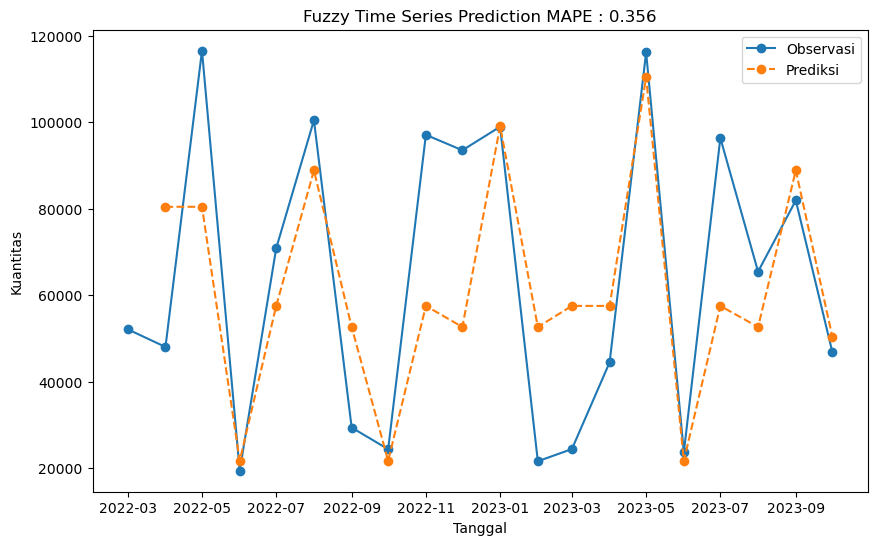

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, hasil_peramalan['kuantitas'].values, label='Observasi', marker='o')
plt.plot(X_test.index, hasil_peramalan['prediksi'].values, label='Prediksi', linestyle='--', marker='o')  # Dimulai dari indeks ke-2 untuk mengatasi nilai prediksi yang kurang
plt.title(f'Fuzzy Time Series Prediction MAPE : {mape.round(3)}')
plt.xlabel('Tanggal')
plt.ylabel('Kuantitas')
plt.legend()
plt.show()